In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

%matplotlib inline:<br>
Magic Functions 在 IPython 獨有，將matplotlib的圖表直接嵌入到Notebook之中，可省略 plt.show()

## 顯示圖片

In [2]:
img = cv2.imread('./test_images/onew_04.jpg')
img.shape

(1200, 975, 3)

In [3]:
img

array([[[217, 177, 212],
        [216, 176, 211],
        [216, 176, 211],
        ...,
        [189, 138, 198],
        [187, 136, 196],
        [189, 138, 198]],

       [[217, 177, 212],
        [217, 177, 212],
        [217, 177, 212],
        ...,
        [191, 140, 200],
        [189, 138, 198],
        [190, 139, 199]],

       [[218, 178, 213],
        [218, 178, 213],
        [217, 177, 212],
        ...,
        [191, 140, 200],
        [191, 140, 200],
        [190, 139, 199]],

       ...,

       [[ 85,  22,  66],
        [ 84,  21,  65],
        [ 83,  20,  64],
        ...,
        [255, 239, 238],
        [255, 239, 238],
        [255, 240, 239]],

       [[ 84,  21,  65],
        [ 83,  20,  64],
        [ 82,  19,  63],
        ...,
        [255, 239, 238],
        [255, 239, 238],
        [255, 240, 239]],

       [[ 83,  20,  64],
        [ 81,  18,  62],
        [ 80,  17,  61],
        ...,
        [255, 239, 238],
        [255, 239, 238],
        [255, 239, 238]]

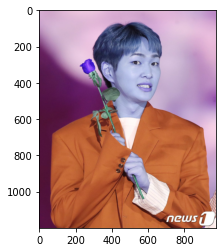

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # cv2.cvtColor : 色彩空間轉化函數 # BGR to GRAY : opencv 預設為 BGR
gray.shape

(1200, 975)

In [11]:
gray

array([[192, 191, 191, ..., 162, 160, 162],
       [192, 192, 192, ..., 164, 162, 163],
       [193, 193, 192, ..., 164, 164, 163],
       ...,
       [ 42,  41,  40, ..., 241, 241, 241],
       [ 41,  40,  39, ..., 241, 241, 241],
       [ 40,  38,  37, ..., 241, 241, 241]], dtype=uint8)

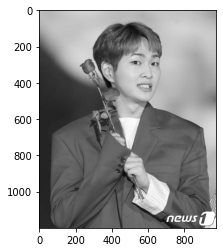

In [12]:
plt.imshow(gray, cmap='gray')  # cmap(colormap) : 顏色圖譜

In [8]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hsv.shape

(1200, 975, 3)

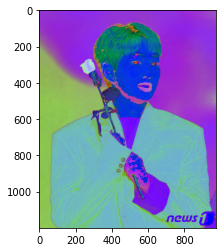

In [9]:
plt.imshow(hsv, cmap='hsv')

## 偵測臉和眼睛

Haar 特徵分類器，描述人體各部位的 Haar 特徵值，包含 face, eyes, lips 等等

In [6]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 6) # (image,scaleFacter每次窗口要移多大,minNeighbors檢測幾次才確定為人臉)
faces # 返回 [x座標, y座標, 寬度, 高度]

array([[428, 176, 296, 296]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(428, 176, 296, 296)

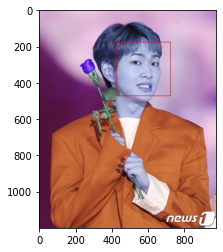

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # (影像,頂點座標,對向頂點座標,顏色,線條寬度)
plt.imshow(face_img)

[[ 71  81  64  64]
 [174  89  62  62]]


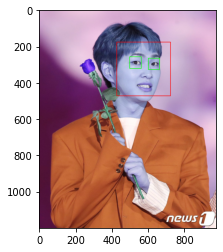

In [9]:
cv2.destroyAllWindows() # 關閉所有 openCV 視窗
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray,1.1,6) # 用灰階找目標，省時間
    print(eyes)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2) # 畫在彩色上
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

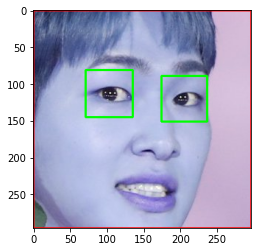

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

## 函數 : 選出能找到兩個眼睛的照片

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 6)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 6)
        if len(eyes) >= 2:
            return roi_color

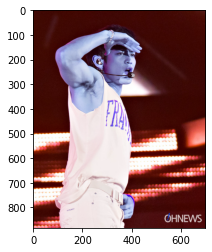

In [16]:
original_image = cv2.imread('./test_images/mh_78.jpg')
plt.imshow(original_image)

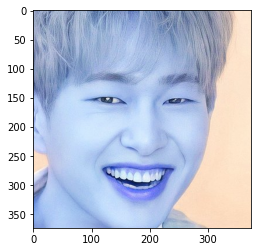

In [12]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/onew_14.jpg')
plt.imshow(cropped_image)

## 挑選符合有兩眼的圖片進 cropped 資料夾

In [13]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [14]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [15]:
img_dirs

['./dataset/cropped',
 './dataset/jonghyun',
 './dataset/key',
 './dataset/minho',
 './dataset/onew',
 './dataset/taemin']

In [16]:
# 建 cropped 資料夾
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [17]:
name_dict = {}
cropped_image_dirs = []
for img_dir in img_dirs:
    count = 1
    name = img_dir.split('/')[-1]
    name_dict[name] = []
    
    for entry in os.scandir(img_dir): # entry為每張照片的路徑
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name # 取出的臉放在 cropped 資料夾中那個人的資料夾
            
            if not os.path.exists(cropped_folder): # 如果那個人的資料夾不在，創一個
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder) 
            
            cropped_file_name = name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name # 新圖片的路徑
            
            cv2.imwrite(cropped_file_path, roi_color)
            name_dict[name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/jonghyun
Generating cropped images in folder:  ./dataset/cropped/key
Generating cropped images in folder:  ./dataset/cropped/minho
Generating cropped images in folder:  ./dataset/cropped/onew
Generating cropped images in folder:  ./dataset/cropped/taemin
